<a href="https://colab.research.google.com/github/streakcraze/accident-detection-in-kenya/blob/main/1Dneuralnet_(with_pca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Acquisition

In [27]:
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/train"

accident_images = os.listdir(os.path.join(train_dir, "accident"))
nonaccident_images = os.listdir(os.path.join(train_dir, "non-accident"))

print(f"accident images are {len(accident_images)}")
print(f"non-accident images are {len(nonaccident_images)}")

accident images are 416
non-accident images are 416


# 2. Data Preprocessing

In [28]:
import numpy as np
from skimage import io, color, transform
import matplotlib.pyplot as plt
import gc

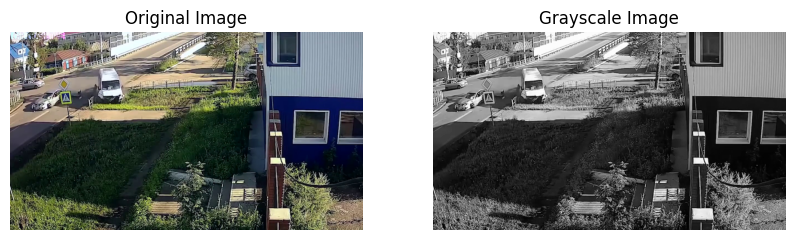

In [29]:
accident_img = io.imread(os.path.join(train_dir, "accident", accident_images[1]))
accident_gray = color.rgb2gray(accident_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(accident_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(accident_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

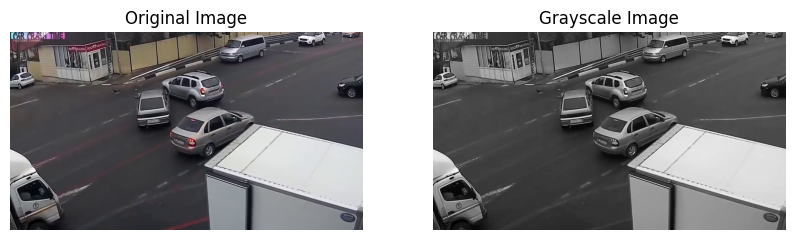

In [30]:
nonaccident_img = io.imread(os.path.join(train_dir, "non-accident", nonaccident_images[1]))
nonaccident_gray = color.rgb2gray(nonaccident_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(nonaccident_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nonaccident_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [31]:
features = np.array([])
# "0" for accident and "1" for nonaccident
labels = np.append(np.full(416, 0), np.full(416, 1))

In [32]:
accident_features = []

print("loading accident images ...")

for img in accident_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(train_dir, "accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  accident_features.append(flat_img)

features = np.vstack(accident_features)
del accident_features
gc.collect()
print("loaded accident images successfully")

loading accident images ...
loaded accident images successfully


In [33]:
nonaccident_features = []

print("loading non-accident images ...")

for img in nonaccident_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(train_dir, "non-accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  nonaccident_features.append(flat_img)

features = np.append(features, nonaccident_features, axis=0)
del nonaccident_features
gc.collect()
print("loaded non-accident training images successfully")

loading non-accident images ...
loaded non-accident training images successfully


In [34]:
from sklearn.decomposition import PCA

In [35]:
print("applying principal component analysis ...")
pca = PCA(n_components=0.9)
pca.fit(features)

principal_features = pca.transform(features)
print(f"features reduced from {len(features[0])} to {len(principal_features[0])}")

del features
gc.collect()
print("principal component analysis completed")

applying principal component analysis ...
features reduced from 2500 to 26
principal component analysis completed


# 3. Model Training

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
print("splitting data into training and test sets")
x_train, x_test, y_train, y_test = train_test_split(principal_features, labels, test_size=0.3, random_state=42, stratify=labels)

del principal_features
del labels
gc.collect()
print("split completed")

splitting data into training and test sets
split completed


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [39]:
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(pca.n_components_,), activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))

# Output layer with 1 neuron and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3456      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
print("model training started")
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/image_classifier_1Dneuralnet(1).sav")
del x_train
del y_train
gc.collect()
print("model artifact saved")

model training started
Epoch 1/10
19/19 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5189
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5361
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5928
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5911
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6014
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6237
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6065
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6529
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6581
Epoch 10/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6

# 4. Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [42]:
# testing the model
y_pred = model.predict(x_test)
binary_y_pred = (y_pred > 0.5).astype(int)

# calculating the accuracy of the model
accuracy = accuracy_score(binary_y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

8/8 [==============================] - 0s 2ms/step
The model is 66.4% accurate


In [43]:
# printing the classification report
print("Classification report:")
print(classification_report(y_test, binary_y_pred, target_names=['accident', 'non-accident']))

Classification report:
              precision    recall  f1-score   support

    accident       0.83      0.42      0.55       125
non-accident       0.61      0.91      0.73       125

    accuracy                           0.66       250
   macro avg       0.72      0.66      0.64       250
weighted avg       0.72      0.66      0.64       250



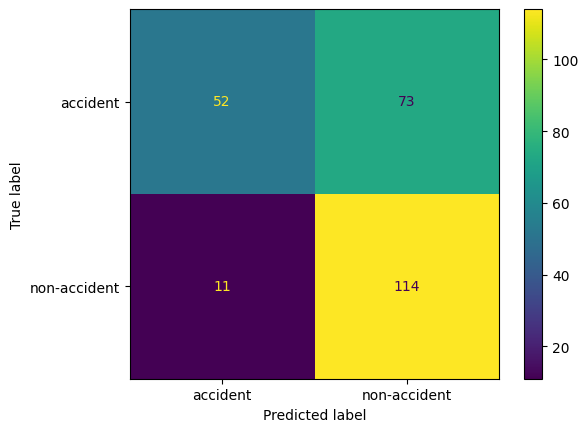

In [44]:
# plotting the confusion matrix
cm = confusion_matrix(y_test, binary_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["accident", "non-accident"])
cm_display.plot()
plt.show()

# 5. Model Testing

In [45]:
val_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/val"

val_images = os.listdir(val_dir)

print(f"validation dataset has {len(val_images)} images")

validation dataset has 92 images


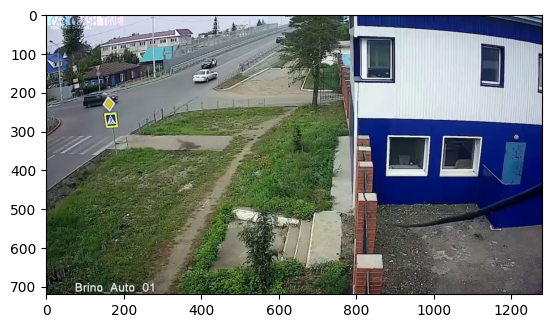

1/1 [==============================] - 0s 29ms/step
Model says it is non-accident


In [46]:
val_img = io.imread(os.path.join(val_dir, val_images[0]))

plt.imshow(val_img)
plt.show()

gray_val_img = color.rgb2gray(val_img)
resized_val_img = transform.resize(gray_val_img, (50, 50))
normalized_val_img = resized_val_img / 255.0
flat_val_img = normalized_val_img.flatten()

principal_val_img = pca.transform([flat_val_img])

img_pred = model.predict(principal_val_img)

if(img_pred > 0.5):
    print("Model says it is non-accident")
else:
    print("Model says it is accident")


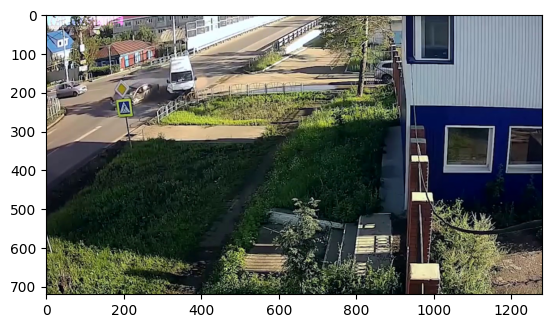

1/1 [==============================] - 0s 43ms/step
Model says it is accident


In [50]:
val_img = io.imread(os.path.join(val_dir, val_images[70]))

plt.imshow(val_img)
plt.show()

gray_val_img = color.rgb2gray(val_img)
resized_val_img = transform.resize(gray_val_img, (50, 50))
normalized_val_img = resized_val_img / 255.0
flat_val_img = normalized_val_img.flatten()

principal_val_img = pca.transform([flat_val_img])

img_pred = model.predict(principal_val_img)

if(img_pred > 0.5):
    print("Model says it is non-accident")
else:
    print("Model says it is accident")


In [ ]:
import cv2
from IPython.display import display, Image

In [ ]:
video_accident_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/videos/accident"

In [ ]:
# Open the video file
cap = cv2.VideoCapture(os.path.join(video_accident_dir, "accident1.mp4"))

# Loop through each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Your image classification code goes here for each frame

    # Convert the frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame in the Colab notebook
    display(Image(data=cv2.imencode('.png', frame_rgb)[1]))

    # Press 'q' to exit the video
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
